# Home work 2 Solutions 

### Problem 1

#### 1) Nitromethane chemical formula - $CH_{3}NO_{2}$
#### 2) Acetone chemical formula - $C_{3}H_{6}O$
#### 3) Acetonitrile chemical formula - $C_{2}H_{3}N$

#### Use Antoine equations to calculate their normal boiling points (at 1 bar pressure) and saturation pressures (at 25&deg;C)

4.78 kPa (Nitromethane)
30.66 kPa (Acetone)
12.27 kPa (Acetonitrile)

Normal boiling point for nitromethane = 100.7
Normal boiling point for acetone = 55.8
Normal boiling point for acetonitrile = 81.2


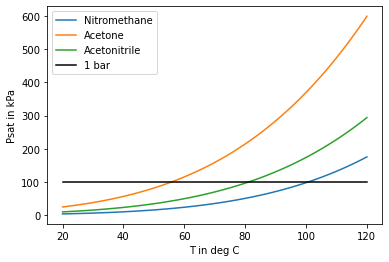

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt

#creating a dictionary 
ant_coeffs = {}
ant_coeffs.update({"Nitromethane": (14.7513, 3331.19, 227.6)})
ant_coeffs.update({"Acetone": (14.3145, 2756.22, 228.06)})
ant_coeffs.update({"Acetonitrile": (14.8950, 3413.10, 250.523)})


ant_coeffs
#plotting Pi_sat vs T
import numpy as np
def Pi_sat(ant_coeff: tuple, T: float):
    A, B, C = ant_coeff # this unpacks the tuple
    return np.round(np.exp(A - B/(C+T)),2)
T_range = np.linspace (20,120,101)
psat_1range =np.zeros(len(T_range))
psat_2range =np.zeros(len(T_range))
psat_3range =np.zeros(len(T_range))

for species in ant_coeffs.keys():
    for i, T in enumerate(T_range):
        psat_1range [i]= Pi_sat(ant_coeffs["Nitromethane"],T)
        psat_2range[i]=Pi_sat(ant_coeffs["Acetone"],T)
        psat_3range[i]=Pi_sat(ant_coeffs["Acetonitrile"],T)
plt.plot(T_range, np.array(psat_1range),'-',label="Nitromethane")
plt.plot(T_range, np.array(psat_2range),'-',label="Acetone")
plt.plot(T_range, np.array(psat_3range),'-',label="Acetonitrile")
plt.plot(T_range, 1*100*np.ones(len(T_range)),'-k',label='1 bar')
plt.xlabel('T in deg C')
plt.ylabel('Psat in kPa')
plt.legend()
p_sat_nitrom=Pi_sat(ant_coeffs["Nitromethane"],T=25.0)
p_sat_acetone=Pi_sat(ant_coeffs["Acetone"],T=25.0)
p_sat_acetntryl=Pi_sat(ant_coeffs["Acetonitrile"],T=25.0)
print (p_sat_nitrom, "kPa (Nitromethane)")
print (p_sat_acetone, "kPa (Acetone)")
print (p_sat_acetntryl, "kPa (Acetonitrile)")

def T_bp(ant_coeffs,P):
    A,B,C =ant_coeffs
    T=(B/(-np.log(P)+A)-C)
    return np.round(T,1)

print('\nNormal boiling point for nitromethane =',T_bp(ant_coeffs["Nitromethane"], 100))
print('Normal boiling point for acetone =',T_bp(ant_coeffs["Acetone"], 100))
print('Normal boiling point for acetonitrile =',T_bp(ant_coeffs["Acetonitrile"], 100))

#### Acetone is the most volatile out of the three species.
#### This implies it will start vaporizing the fastest of all.

### Problem 2

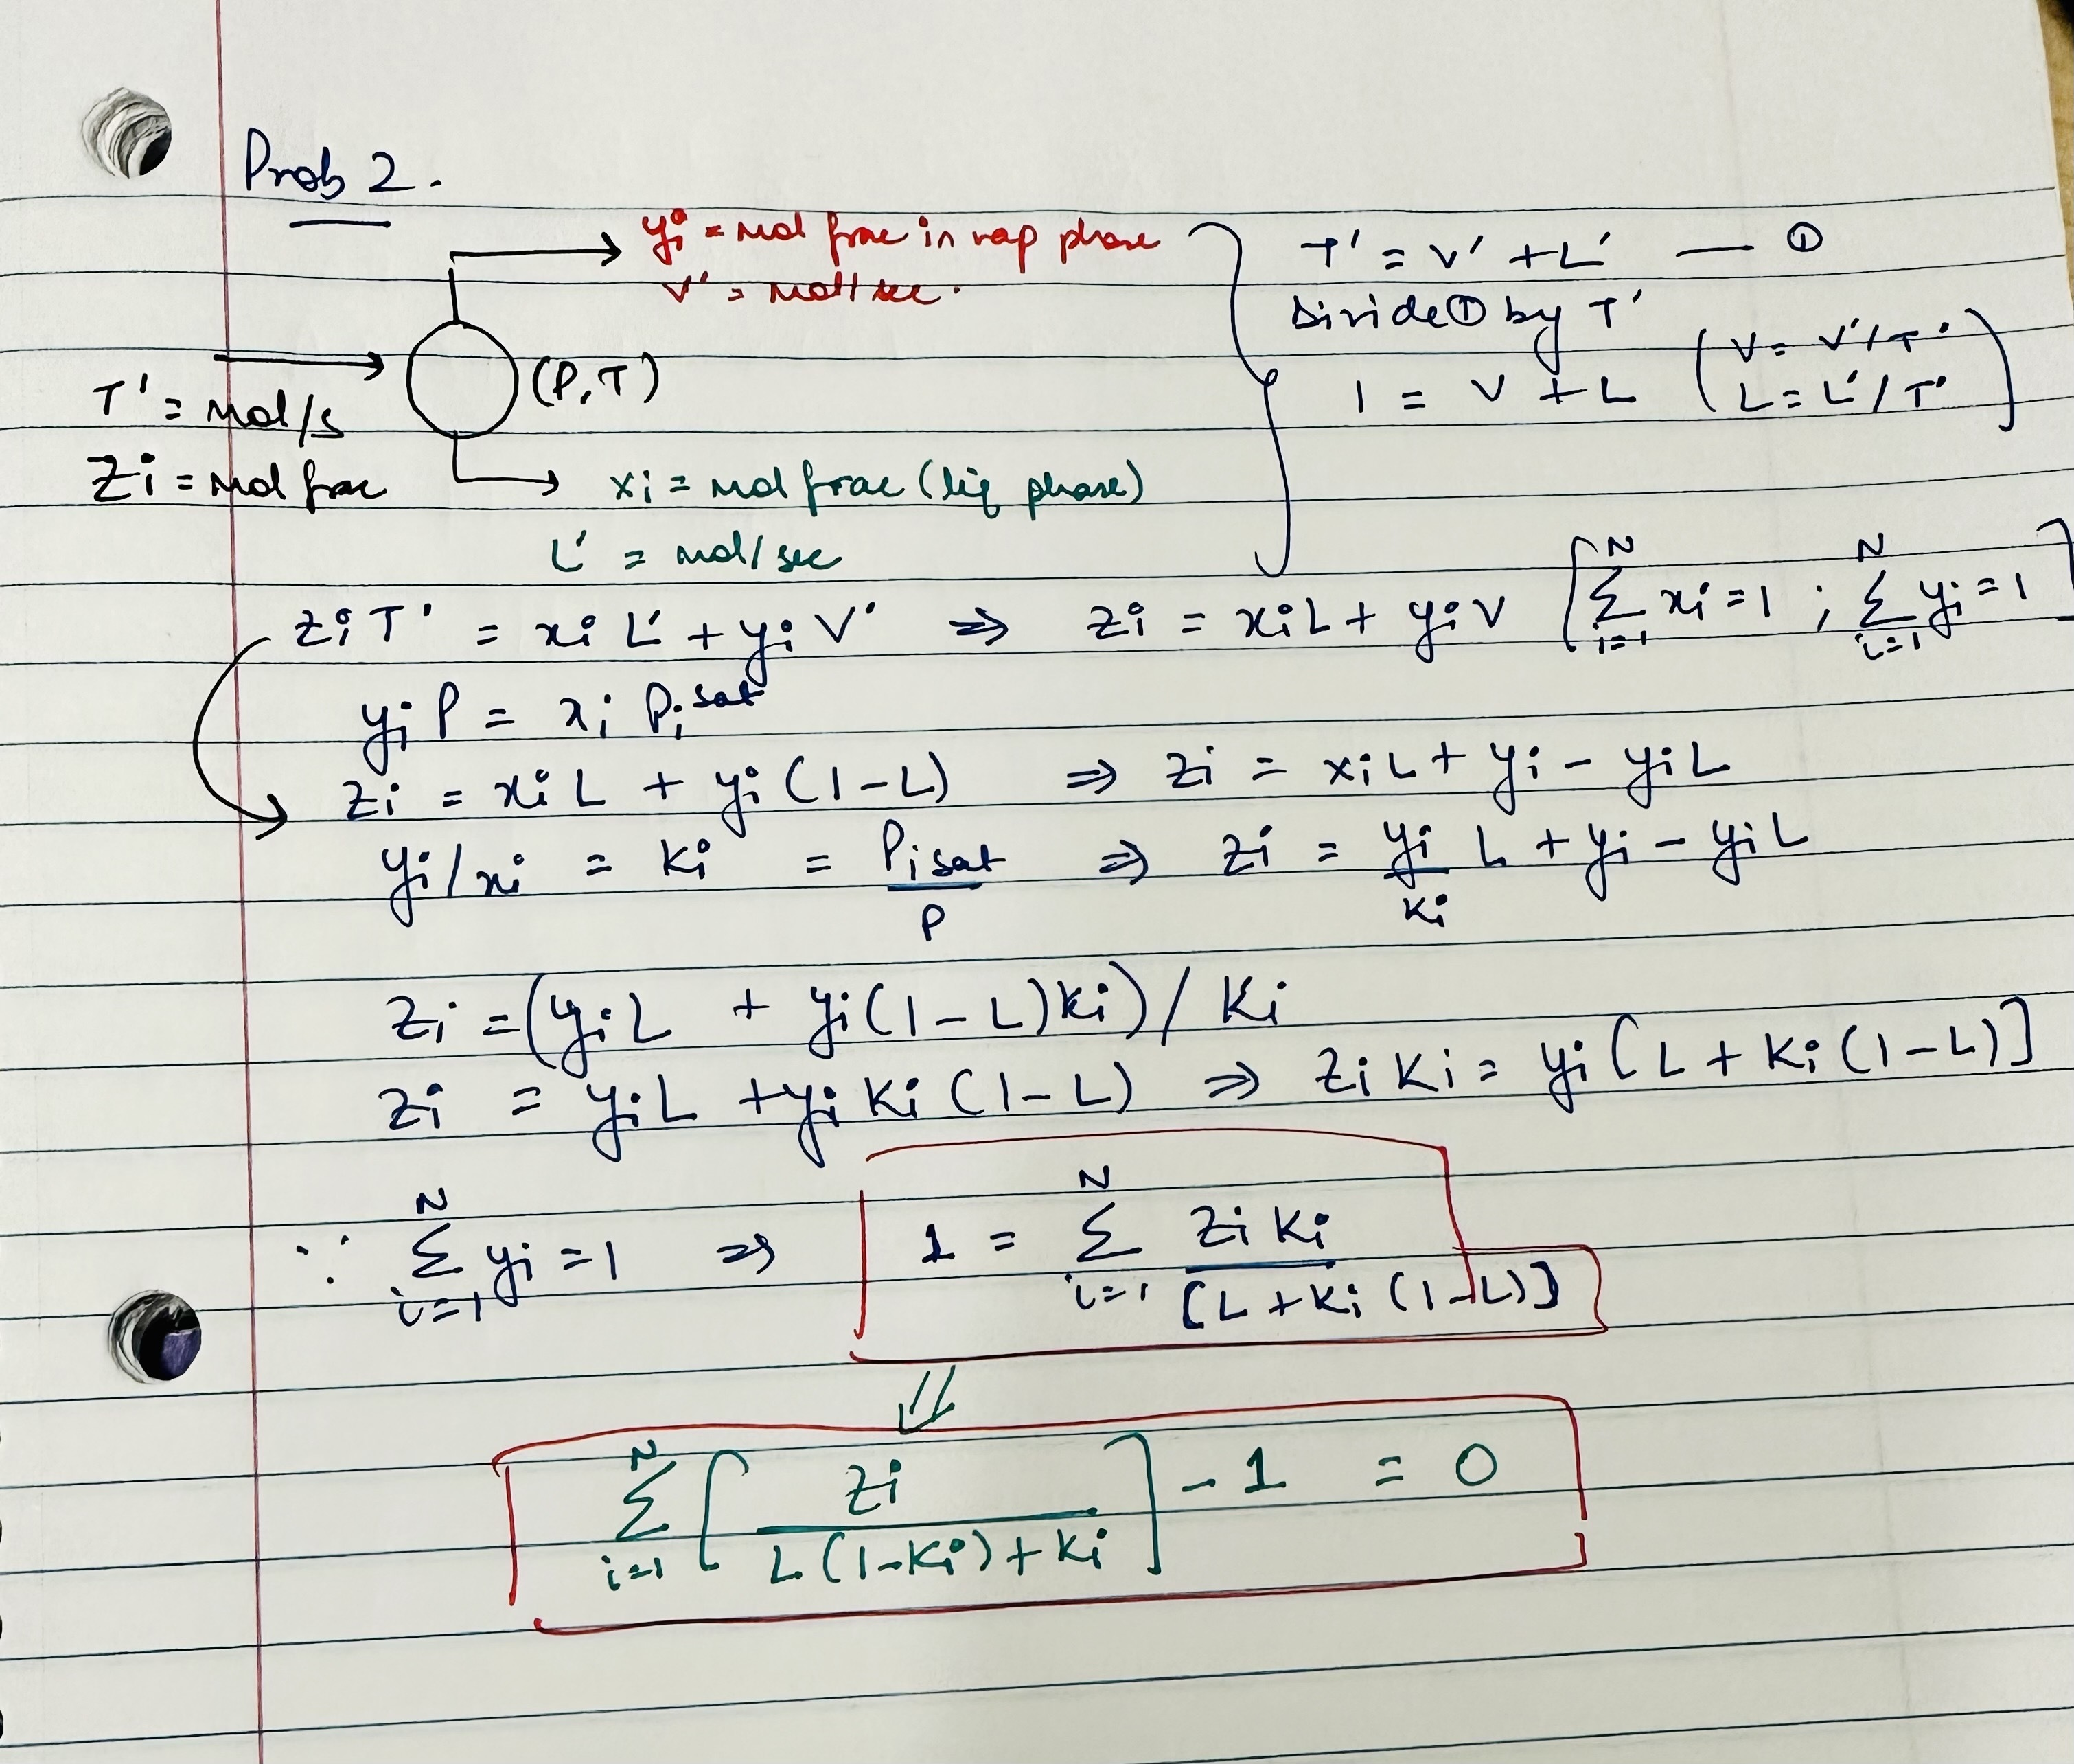

### Problem 3

In [142]:
#creating a dictionary 
ant_coeffs = {}
ant_coeffs.update({"Nitromethane": (14.7513, 3331.19, 227.6)})
ant_coeffs.update({"Acetone": (14.3145, 2756.22, 228.06)})
ant_coeffs.update({"Acetonitrile": (14.8950, 3413.10, 250.523)})
ant_coeffs.update({"Ethanol":(16.8958,3795.17,230.918)})
ant_coeffs.update({"Water":(16.3872,3885.70,230.170)})
ant_coeffs.update({"Methanol":(16.5785,3638.27,239.500)})

p_sat1 = Pi_sat(ant_coeffs["Nitromethane"],10.0)
p_sat2 = Pi_sat(ant_coeffs["Acetone"], 10.0)
p_sat3 = Pi_sat(ant_coeffs["Acetonitrile"], 10.0)
p_sat4 = Pi_sat(ant_coeffs["Ethanol"], 10.0)
p_sat5 = Pi_sat(ant_coeffs["Water"], 10.0)
print('P_sat  for nitromethane =',p_sat1)
print('P_sat  for acetone =',p_sat2)
print('P_sat  for acetonitrile =',p_sat3)
print('P_sat  for thanol =',p_sat4)
print('P_sat  for water =',p_sat5)

P_sat  for nitromethane = 2.08
P_sat  for acetone = 15.44
P_sat  for acetonitrile = 6.01
P_sat  for thanol = 3.14
P_sat  for water = 1.23


### Bubble point calculation
#### $P^{bub}=\sum(X_{i}P_{i}^{sat})$

In [113]:
#5 equimolar species = 0.2 mole fractions for each
p_bub = 0.2*(p_sat1+p_sat2+p_sat3+p_sat4+p_sat5)
print("Bubble point is", np.round(p_bub,2),"kPa")

Bubble point is 5.58 kPa


### Dew point calculation
#### $P^{dew}=1/\sum(Y_{i}/P_{i}^{sat})$

In [114]:
p_dew = 1/(0.2*(1/p_sat1+1/p_sat2+1/p_sat3+1/p_sat4+1/p_sat5))
print("Dew point is", np.round(p_dew,2),"kPa")

Dew point is 2.71 kPa


### Problem 4
#### Testing our understanding of fsolve
#### Here I took a simple example of a parabola and the roots are plotted in "blue" 
#### The solution from fsolve is show in "orange"


[5.]


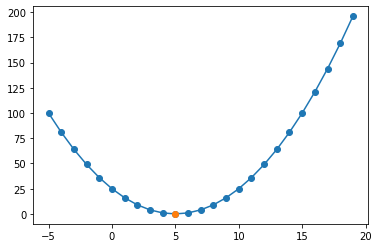

In [115]:
from scipy.optimize import fsolve # import fsolve
from math import cos

# func object can be used both for simple parabola and for fsolve too. 

def func(x):
    y= (x**2)-(10*x)+25
    return(y)

ans = fsolve(func,2)   #solving the equation to find root via fsolve

#single parabola to test 
x=np.arange(-5,20,1)
y= (x**2)-(10*x)+25
plt.plot(x, y,marker='o')  #without fsovle
plt.plot(ans,0,marker='o')  #root from fsolve
print (np.round(ans,2))


### Problem 5

In [116]:
import random
def rel_vol(T,p,species):
    A,B,C = ant_coeffs[species]
    psat = np.round(np.exp(A - B/(C+T)))
    k=psat/p
    return k

T= 10
p= 120 #kPa

k1= rel_vol(T,P,"Nitromethane")
k2= rel_vol(T,P,"Acetone")
k3= rel_vol(T,P,"Acetonitrile")
k4= rel_vol(T,P,"Ethanol")
k5= rel_vol(T,P,"Water")

#equimolar solution --> mole fractions 0.2 for each
#Function to calculate L_prime
def flash(x):
    f=(0.2*k1)/(x+k1*(1-x))+ (0.2*k2)/(x+k2*(1-x))+(0.2*k3)/(x+k3*(1-x))+(0.2*k4)/(x+k4*(1-x))+\
    (0.2*k5)/(x+k5*(1-x))-1
    return f
    
ans =fsolve(flash, 1)
print('L prime is',ans)
T=10 #Value taken form problem 3 as stated in the question
print('L is',ans*T)

#Function to calculate V_prime
def flash2(V):
    f=(0.2*k1)/(1+V*(k1-1))+(0.2*k2)/(1+V*(k2-1))+(0.2*k3)/(1+V*(k3-1))+(0.2*k4)/(1+V*(k4-1))+\
    (0.2*k5)/(1+V*(k5-1))-1
    return f
    
ans2 =fsolve(flash2, 1)
print('V_prime =',ans2)
print('V =',ans2*T)


L prime is [0.31373583]
L is [3.13735827]
V_prime = [1.]
V = [10.]


### Problem 6

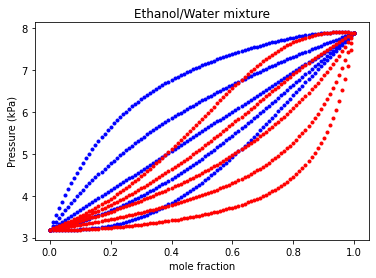

In [117]:
T =25 # deg C
species_1 = "Ethanol"
species_2 = "Water"

P1_sat = Pi_sat(ant_coeffs[species_1], T)
P2_sat = Pi_sat(ant_coeffs[species_2], T)
#print(P1_sat)
#print(P2_sat)

x1 = np.linspace(0,1,101)
x2 = 1-x1
for A in (-1,-0.5,0,0.5,1):
    gamma_1 = np.exp(A*x2**2)
    gamma_2 = np.exp(A*x1**2)
    p_bub = x1*gamma_1*P1_sat+x2*gamma_2*P2_sat
    plt.plot(x1,p_bub,".b")
    
    y1 = np.linspace(0,1,101)
    p_dew = 1/(y1/(gamma_1*P1_sat)+(1-y1)/(gamma_2*P2_sat))
    plt.plot(y1,p_dew,".r")
    
plt.title ("Ethanol/Water mixture")
plt.xlabel("mole fraction")
plt.ylabel("Pressure (kPa)")
plt.show()

### Problem 7

In [118]:
T = 25 # deg C
p1_sat = Pi_sat(ant_coeffs["Methanol"], T)
p2_sat = Pi_sat(ant_coeffs["Water"], T)
print ("Pi_sat for methanol =",p1_sat,"kPa")
print ("Pi_sat for water =",p2_sat,"kPa")

Pi_sat for methanol = 16.83 kPa
Pi_sat for water = 3.19 kPa


Text(0, 0.5, 'y1')

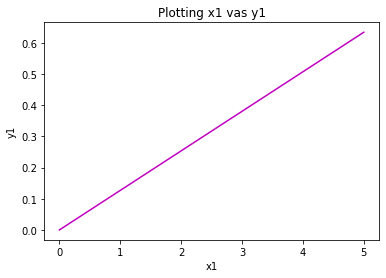

In [131]:
#Using Raoult's law
P = 1 #bar
y1 = np.linspace(0.001,5,30)
x1 = y1*P/P1_sat
plt.plot(y1,x1,"m")
plt.title("Plotting x1 vas y1")
plt.xlabel("x1")
plt.ylabel("y1")


Text(0, 0.5, 'K')

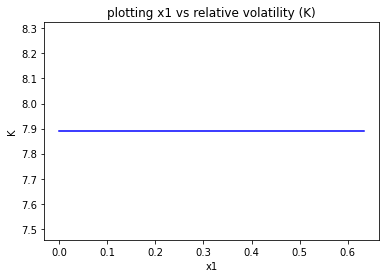

In [141]:
#plotting relative volatility
K = y1/x1
plt.plot(x1,K,"b")
plt.title("plotting x1 vs relative volatility (K)")
plt.xlabel("x1")
plt.ylabel("K")